In [14]:
import sys
import os
from pathlib import Path

current_dir = os.getcwd()

file = Path(current_dir).resolve()
sys.path.append(str(file.parents[0]))
sys.path.append(str(file.parents[1]))
sys.path.append(str(file.parents[2]))

In [15]:
#import cityscapesscripts
from torchvision.datasets.cityscapes import Cityscapes
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from utils.cs_tools import reduce_classes
#from PIL import Image

In [16]:
cityscapes_root_path : Path = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/Cityscapes/'
cityscapes_ds = Cityscapes(root=cityscapes_root_path, target_type='semantic')
img_size = cityscapes_ds[0][0].size
print(img_size)

(2048, 1024)


# Iterating through dataset to see how many differently sized or truncated imgs there are

In [4]:
for i in range(len(cityscapes_ds)):
    try:
        img, gt = cityscapes_ds[i]
        if img.size != img_size:
            print(f"Different sized image: index {i}, size {img.size}")
        if gt.size != img_size:
            print(f"Different sized image: index {i}, size {gt.size}")
    except OSError as e:
        print(f"Error loading image at index {i}: {e}")

KeyboardInterrupt: 

# Example Images

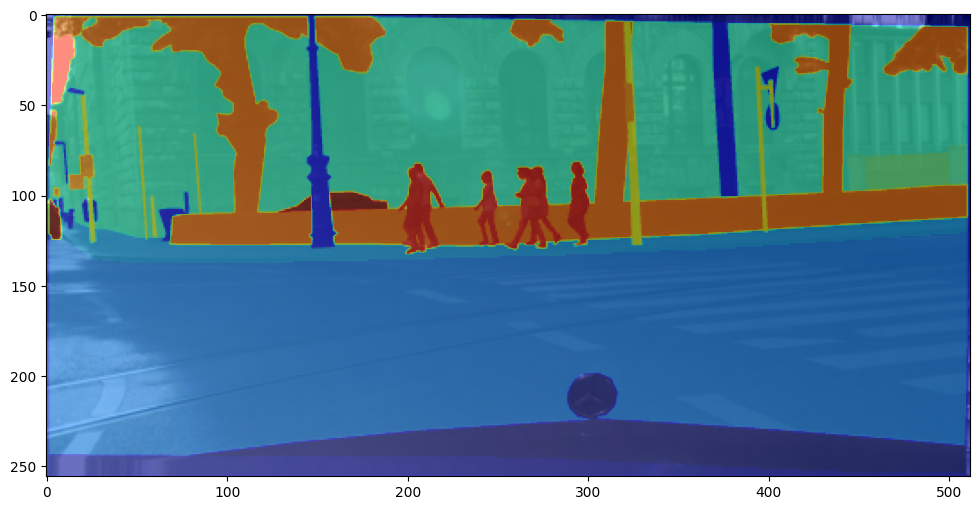

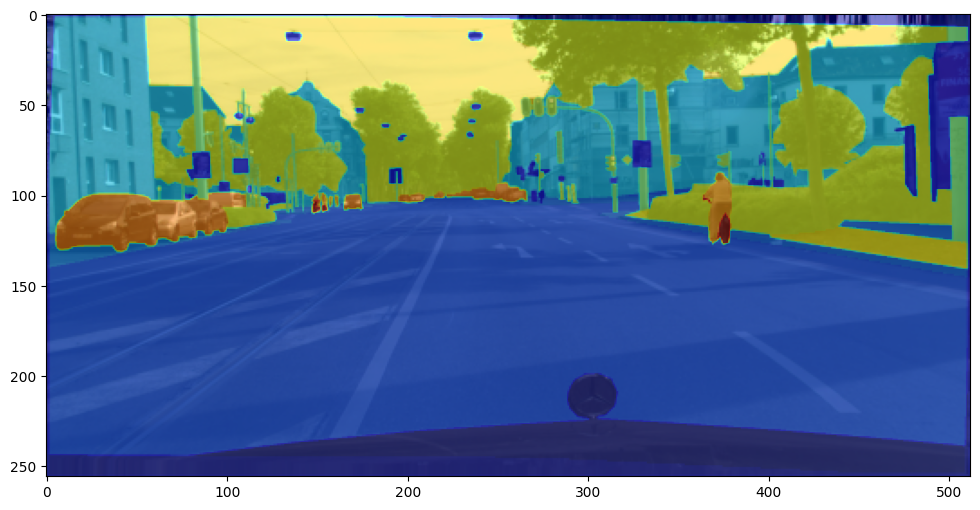

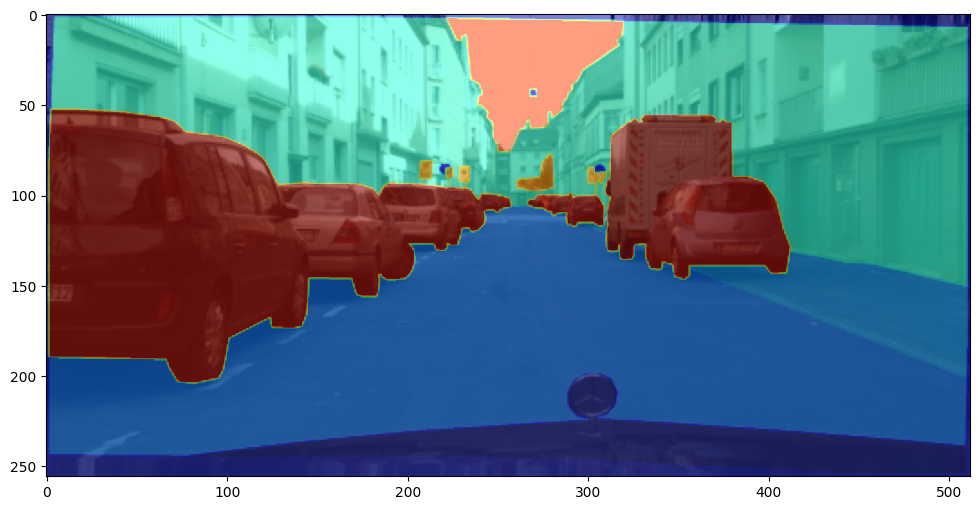

In [23]:
for i in range(3):
    img, gt = cityscapes_ds[i]
    plt.figure(figsize=[12, 6])
    plt.imshow(img.reduce(4))
    plt.imshow(gt.reduce(4), cmap= "jet", alpha = 0.5)
    plt.show()  

# Check how many images contain street sign class

In [7]:
test_range = 80
sign_counter = 0

for i in range(test_range):
    _, gt = cityscapes_ds[i]
    np_gt = np.array(gt)
    #print(f"unique classes in gt: {np.unique(np_gt)}")
    if 20 in np.unique(np_gt):
        #print(f"sample {i} contains street signs")
        sign_counter += 1

print(f" for {test_range} samples there are {sign_counter} traffic signs")


 for 80 samples there are 78 traffic signs


# Testing Downsample on dummy GT

In [17]:
from skimage.measure import block_reduce

## Create dummy GT

In [6]:
# Define the dimensions
x, y = 200, 200  # Replace with your desired dimensions

# Create a 2D array filled with zeros
circle_array = np.zeros((x, y))

# Define the radius of the circle (let's assume a radius of 50)
radius = 50

# Calculate the center of the array
center_x, center_y = x // 2, y // 2

# Generate a meshgrid to calculate the distance from the center
X, Y = np.meshgrid(np.arange(x), np.arange(y), indexing='ij')

# Calculate the distance from the center for each point
distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)

# Set ones inside the circle (where the distance is less than or equal to the radius)
circle_array[distance <= radius] = 1

[]

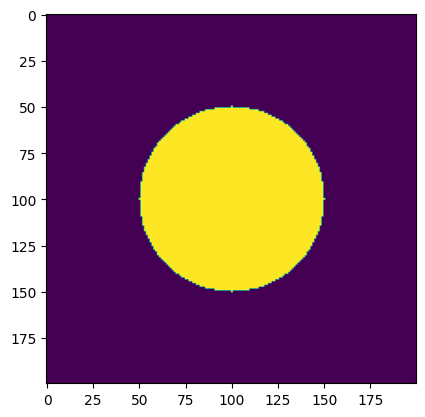

In [18]:
plt.imshow(circle_array)
plt.plot()

## Apply downsampling

## Factors 2 and 4

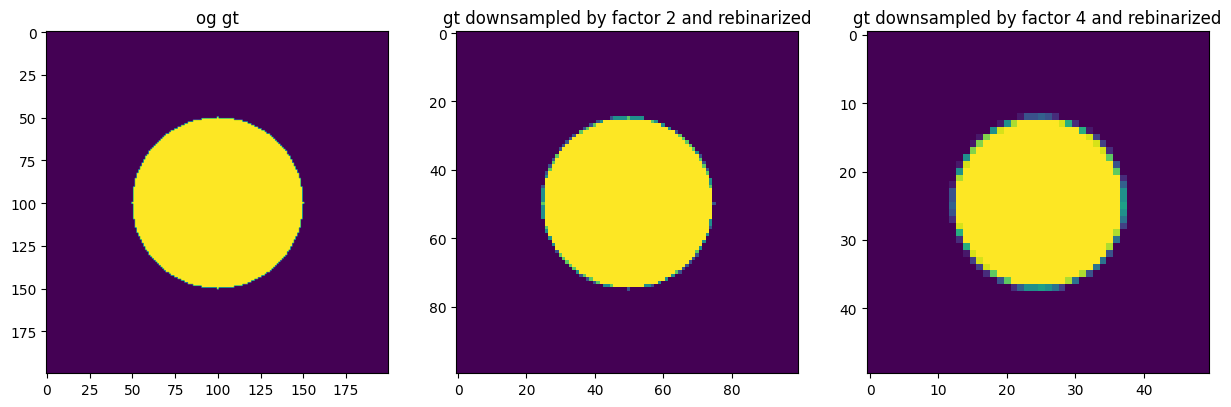

In [53]:
low_fac = 2
high_fac = 4
low_down_img = block_reduce(circle_array,low_fac, np.mean)
high_down_img = block_reduce(circle_array,high_fac, np.mean)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(circle_array)
ax[0].set_title('og gt')
ax[1].imshow(low_down_img)
ax[1].set_title(f'gt downsampled by factor {low_fac} and rebinarized')
ax[2].imshow(high_down_img)
ax[2].set_title(f'gt downsampled by factor {high_fac} and rebinarized')
fig.show()

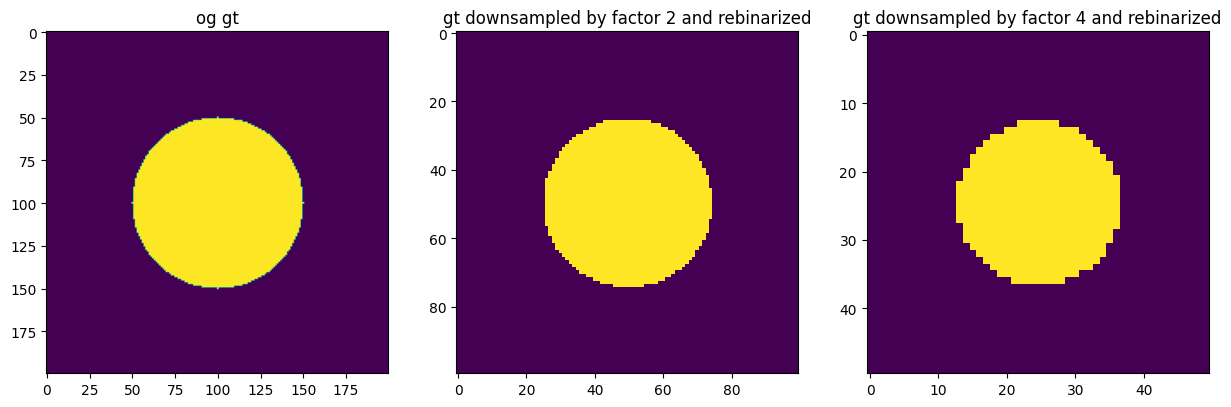

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(circle_array)
ax[0].set_title('og gt')
ax[1].imshow(low_down_img.astype(np.int8))
ax[1].set_title(f'gt downsampled by factor {low_fac} and rebinarized')
ax[2].imshow(high_down_img.astype(np.int8))
ax[2].set_title(f'gt downsampled by factor {high_fac} and rebinarized')
fig.show()

## Factors 4 and 8

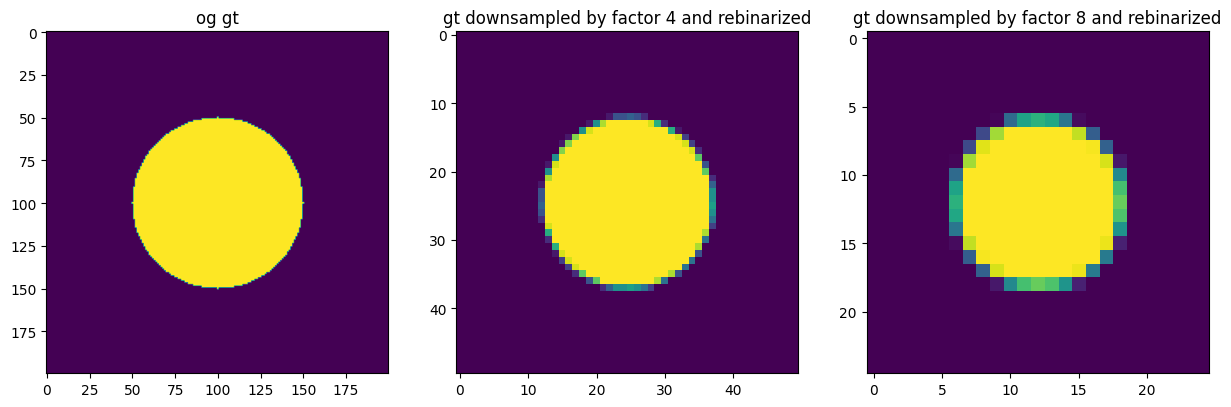

In [49]:
low_fac = 4
high_fac = 8
low_down_img = block_reduce(circle_array,low_fac, np.mean)
high_down_img = block_reduce(circle_array,high_fac, np.mean)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(circle_array)
ax[0].set_title('og gt')
ax[1].imshow(low_down_img)
ax[1].set_title(f'gt downsampled by factor {low_fac} and rebinarized')
ax[2].imshow(high_down_img)
ax[2].set_title(f'gt downsampled by factor {high_fac} and rebinarized')
fig.show()

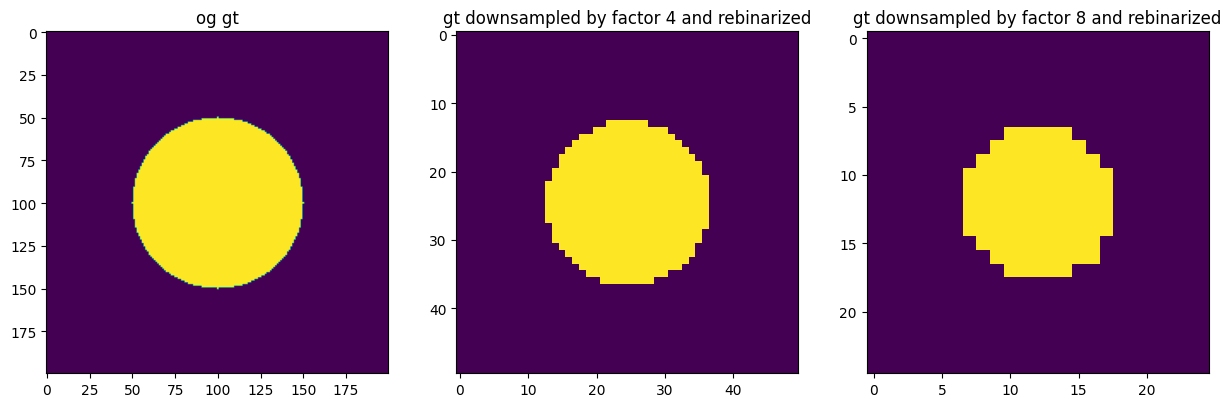

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(circle_array)
ax[0].set_title('og gt')
ax[1].imshow(low_down_img.astype(np.int8))
ax[1].set_title(f'gt downsampled by factor {low_fac} and rebinarized')
ax[2].imshow(high_down_img.astype(np.int8))
ax[2].set_title(f'gt downsampled by factor {high_fac} and rebinarized')
fig.show()

In [44]:
print(np.unique(low_down_img))
print(np.unique(low_down_img.astype(np.int8)))

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.5    0.5625 0.625
 0.75   0.8125 0.875  0.9375 1.    ]
[0 1]


# Testing Downsampling on a ground truth and image

## Loading data and filtering only traffic sign class

In [39]:
#import torch.nn.functional as F
from skimage.measure import block_reduce

In [42]:
#loading img and gt
img, gt = cityscapes_ds[4]

class_id = 20

reduced_gt = reduce_classes(gt, class_id)

In [43]:
print(np.array(img).shape)
print(np.array(gt).shape)
print(reduced_gt.shape)

(1024, 2048, 3)
(1024, 2048)
(1024, 2048)


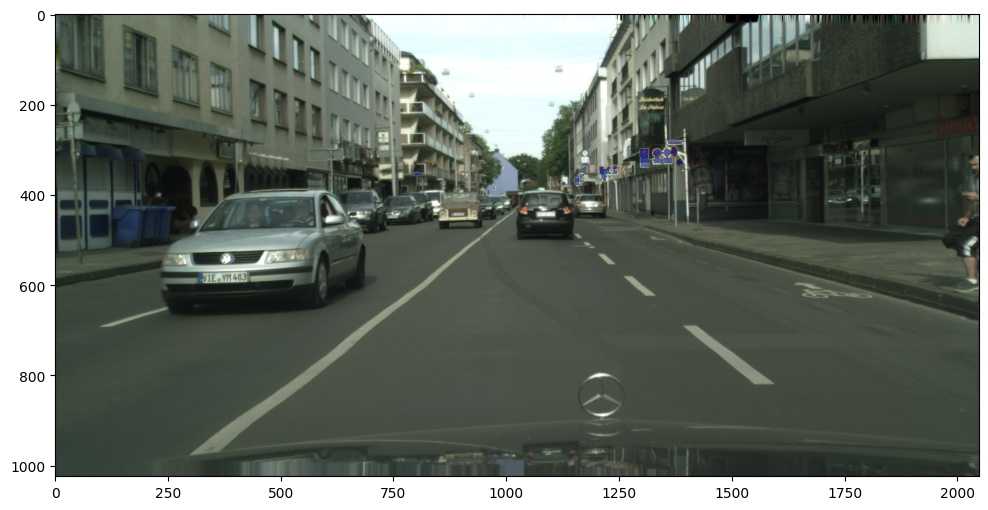

In [73]:
#creating a masked gt where background is transparent
gt_transparent = np.where(reduced_gt == 0, np.nan, reduced_gt)

#plotting all
plt.figure(figsize=[12, 6])
plt.imshow(img)
plt.imshow(gt_transparent, cmap= "jet", alpha = 0.5)
plt.show()

## Downsample img and gt

In [74]:
down_fac = 4

In [75]:
img_array = np.array(img)
down_gt = block_reduce(reduced_gt, block_size=down_fac ,func = np.mean)
down_img = block_reduce(img_array, block_size= (down_fac,down_fac,1), func = np.mean).astype(np.uint8)

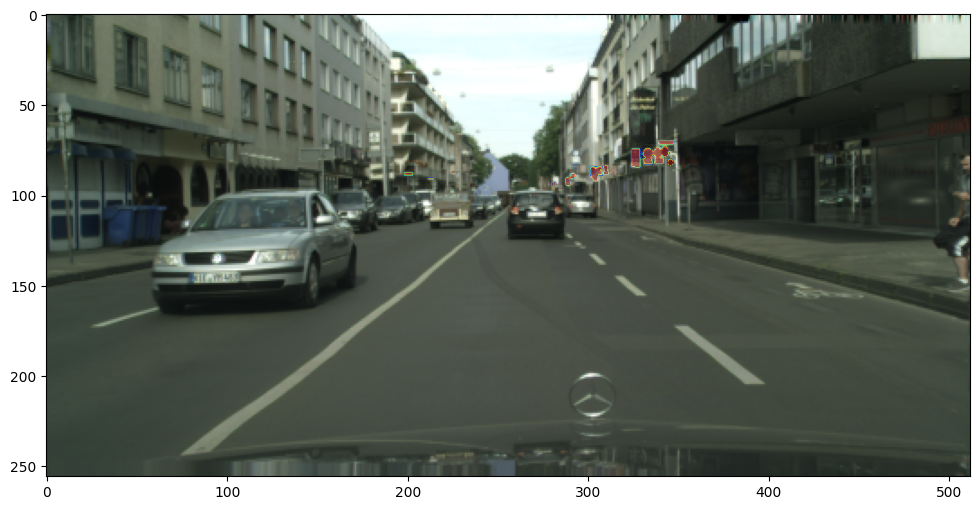

In [76]:
#creating a masked gt where background is transparent
gt_transparent = np.where(down_gt == 0, np.nan, down_gt)

plt.figure(figsize=[12, 6])
plt.imshow(down_img)
plt.imshow(gt_transparent, cmap= "jet", alpha = 0.5)
plt.show()

# Test CityscapesLightningModule

In [4]:
from data.cityscapes_dataset import CityscapesDataModule, CityscapesDataset
from argparse import Namespace

In [5]:
cityscapes_root_path : Path = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/Cityscapes/'
opt = Namespace(bs = 2, n_cpu = 20, ds_factor = 4, sigma = 1)
cs_ds = CityscapesDataset(opt, cityscapes_root_path)

ds_img_shape = cs_ds[0]['img'].shape
ds_gt_shape = cs_ds[0]['seg'].shape

print(f" shape of imgs from ds: {ds_img_shape}")
print(f" shape of gts from ds: {ds_gt_shape}")

 shape of imgs from ds: torch.Size([3, 256, 512])
 shape of gts from ds: torch.Size([1, 256, 512])


## Checking sizes of all images and gt that are output

In [7]:
# Checking if all items that are returned by dataset have same shape

for i in range(len(cs_ds)):
    try:
        dict = cs_ds[i]
        img = dict['img']
        gt = dict['seg']
        if img.shape != ds_img_shape:
            print(f"Different sized image: index {i}, size {img.shape}")
        if gt.shape != ds_gt_shape:
            print(f"Different sized image: index {i}, size {gt.shape}")
    except OSError as e:
        print(f"Error loading image at index {i}: {e}")

ERROR:root:Error loading image at index 1257: image file is truncated
ERROR:root:Error loading image at index 2755: image file is truncated


In [6]:
dict = cs_ds[1257]
img_shape = dict['img'].shape
gt_shape = dict['seg'].shape
print(f"img shape {img_shape}")
print(f"gt shape {gt_shape}")

ERROR:root:Error loading image at index 1257: image file is truncated


img shape torch.Size([3, 256, 512])
gt shape torch.Size([1, 256, 512])


In [7]:
dict = cs_ds[2755]
img_shape = dict['img'].shape
gt_shape = dict['seg'].shape
print(f"img shape {img_shape}")
print(f"gt shape {gt_shape}")

ERROR:root:Error loading image at index 2755: image file is truncated


img shape torch.Size([3, 256, 512])
gt shape torch.Size([1, 256, 512])


In [8]:
print(f"normal shape and stuff")
dict = cs_ds[0]
img_shape = dict['img'].shape
gt_shape = dict['seg'].shape
print(f"img shape {img_shape}")
print(f"gt shape {gt_shape}")

normal shape and stuff
img shape torch.Size([3, 256, 512])
gt shape torch.Size([1, 256, 512])


# Testing which Dice Metrics make sense

In [6]:
import torch
import torchmetrics.functional as mF
from monai.metrics import DiceMetric
from torchmetrics import Dice

In [8]:
TorchDice = Dice()
TorchDiceFG = Dice(ignore_index=0)
MonaiDice = DiceMetric(ignore_empty=False)

In [17]:
gt = cs_ds[0]['seg']
rand_probs = torch.rand(gt.shape)
print(rand_probs)

tensor([[[0.5072, 0.2407, 0.3943,  ..., 0.9985, 0.6121, 0.0783],
         [0.7051, 0.9427, 0.4946,  ..., 0.6731, 0.2306, 0.4616],
         [0.6849, 0.2750, 0.9556,  ..., 0.3965, 0.7495, 0.4521],
         ...,
         [0.5566, 0.7092, 0.0477,  ..., 0.1769, 0.2717, 0.0382],
         [0.7302, 0.0022, 0.2441,  ..., 0.8731, 0.1186, 0.0690],
         [0.4111, 0.8951, 0.8553,  ..., 0.9624, 0.9674, 0.5664]]])


In [18]:
rand_preds = (rand_probs>0.5).int()
print(rand_preds.shape)
print(np.unique(rand_preds))
print(rand_preds)

torch.Size([1, 256, 512])
[0 1]
tensor([[[1, 0, 0,  ..., 1, 1, 0],
         [1, 1, 0,  ..., 1, 0, 0],
         [1, 0, 1,  ..., 0, 1, 0],
         ...,
         [1, 1, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 1, 0, 0],
         [0, 1, 1,  ..., 1, 1, 1]]], dtype=torch.int32)


In [19]:
region_mask = ((rand_preds+gt)>0).int()

print(f"Dice Score w probs : {TorchDice(rand_probs, gt)}")
print(f"Dice FG Score w probs: {TorchDiceFG(rand_probs, gt)}")
print(f"Dice GT Region Masked FG Score w probs: {TorchDice(rand_probs*gt, gt)}")
print(f"Dice Experimental Region Masked FG Score w probs: {TorchDice(rand_probs*region_mask, gt*region_mask)}") # Bei Binary einfach normaler Dice Score
print()
print(f"Dice Score w preds : {TorchDice(rand_preds, gt)}")
print(f"Dice FG Score w preds: {TorchDiceFG(rand_preds, gt)}")
print(f"Dice GT Region Masked FG Score w preds: {TorchDice(rand_preds*gt, gt)}")
print(f"Dice Experimental Region Masked FG Score w preds: {TorchDice(rand_preds*region_mask, gt*region_mask)}")
print(f"Dice p class w preds: {mF.dice(rand_preds, gt, average=None, num_classes=2)}")
print(f"Monai Dice Score w preds: {MonaiDice(rand_preds.unsqueeze(0), gt.unsqueeze(0))}")

Dice Score w probs : 0.004127904307097197
Dice FG Score w probs: 0.004127967171370983
Dice GT Region Masked FG Score w probs: 0.6783042550086975
Dice Experimental Region Masked FG Score w probs: 0.004127904307097197

Dice Score w preds : 0.49935150146484375
Dice FG Score w preds: 0.004127904307097197
Dice GT Region Masked FG Score w preds: 0.9990158081054688
Dice Experimental Region Masked FG Score w preds: 0.49935150146484375
Dice p class w preds: tensor([0.6656, 0.0041])
Monai Dice Score w preds: tensor([[0.0041]])
